# 1. Import Libraries

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Airfare from 1995 - 2021

In [16]:
# Use pandas to read the csv

annual_fares = pd.read_csv('annual_fares.csv')

In [17]:
# Check output and headings

annual_fares

,Year,Inflation_Adjusted_Fare,Average_Fare
0,1995,518,292
1,1996,482,277
2,1997,467,287
3,1998,495,309
4,1999,530,324
5,2000,527,339
6,2001,521,321
7,2002,473,312
8,2003,459,315
9,2004,452,305


## Graphs

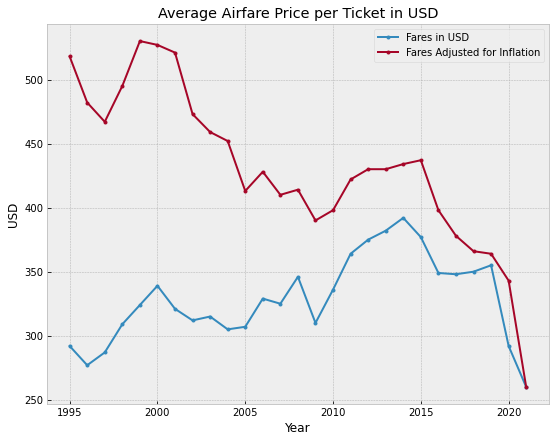

In [18]:
# Plot graphs to show fares over time


# Adjust size
plt.figure(figsize=(9,7))


# Change color palette
plt.style.use('bmh')


# Title
plt.title('Average Airfare Price per Ticket in USD')


# X and Y Axis labels
plt.xlabel('Year')
plt.ylabel('USD') 


# Information to Graph
plt.plot(annual_fares.Year, annual_fares.Average_Fare, marker = '.', label = 'Fares in USD')
plt.plot(annual_fares.Year, annual_fares.Inflation_Adjusted_Fare, marker = '.', label = "Fares Adjusted for Inflation")


# Show legend
plt.legend()


plt.show()

# 3. Airfare from Q1 of 2020 and 2021

In [19]:
# Use pandas to read the csv

airfare_2020 = pd.read_csv('Q1_2020.csv')
airfare_2021 = pd.read_csv('Q1_2021.csv')

# Check chart and headings
airfare_2020

,2020_Passenger_Rank,Airport_Name,City_Name,State_Name,Average_Fare,Sample_Size
0,1,Los Angeles International,Los Angeles,CA,328.17,"513,309"
1,2,Hartsfield-Jackson Atlanta International,Atlanta,GA,359.58,"415,199"
2,3,Denver International,Denver,CO,295.96,"412,135"
3,4,Chicago O'Hare International,Chicago-O'Hare,IL,332.05,"401,710"
4,5,Dallas/Fort Worth International,Dallas-DFW,TX,400.52,"351,090"
...,...,...,...,...,...,...
424,424,Sand Point,Sandpoint,AK,729.00,4
425,426,Middle Georgia Regional,Macon,GA,426.00,3
426,426,Unalaska Airport,Unalaska,AK,1074.33,3
427,428,Wokal Field Glasgow Valley County,Glasgow,MT,332.00,2


In [20]:
# Check headers to rename without whitespace

airfare_2020.columns

Index(['2020_Passenger_Rank', ' Airport_Name ', ' City_Name ', ' State_Name ',
       ' Average_Fare ', ' Sample_Size '],
      dtype='object')

In [21]:
# Remove column header whitespce

airfare_2020.columns = airfare_2020.columns.str.strip()
airfare_2021.columns = airfare_2021.columns.str.strip()

In [22]:
# Check that columns are corrected

print(airfare_2020.columns)
print(airfare_2021.columns)

Index(['2020_Passenger_Rank', 'Airport_Name', 'City_Name', 'State_Name',
       'Average_Fare', 'Sample_Size'],
      dtype='object')
Index(['2020_Passenger_Rank', 'Airport_Name', 'City_Name', 'State_Name',
       'Average_Fare', 'Sample_Size'],
      dtype='object')


In [23]:
# Assign variable
air_ss = airfare_2020.Sample_Size
air_ss21 = airfare_2021.Sample_Size


# Delete Whitespace in Sample_Size column
air_ss = air_ss.str.strip()
air_ss21 = air_ss21.str.strip()


# Delete -NaN in 2021 list
air_ss21[:] = ['0' if x == '-NaN' else x for x in air_ss21]


# Convert from string to numeric
air_ss = air_ss.str.replace(',', '').astype(int)
air_ss21 = air_ss21.str.replace(',', '').astype(int)

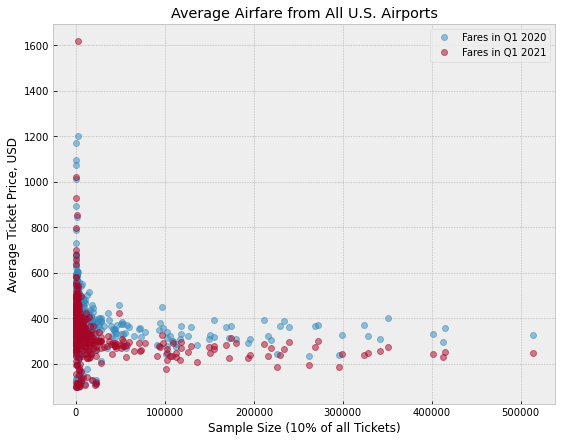

In [24]:
# GRAPH FOR ALL AIRPORTS, Q1 IN 2020 AND 2021


# Adjust size
plt.figure(figsize=(9,7))


# Title
plt.title('Average Airfare from All U.S. Airports')


# X and Y Axis labels
plt.xlabel('Sample Size (10% of all Tickets)')
plt.ylabel('Average Ticket Price, USD') 


# Information to graph
x = air_ss
y = airfare_2020.Average_Fare

x2 = air_ss21
y2 = airfare_2021.Average_Fare


# Scatter Plot
plt.plot(x, y, 'o', alpha=0.5, label='Fares in Q1 2020')
plt.plot(x2, y2, 'o', alpha=0.5, label='Fares in Q1 2021')


# Show legend
plt.legend()


plt.show()

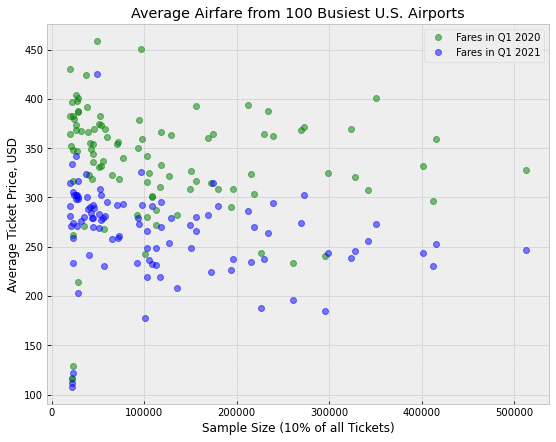

In [25]:
#GRAPH FOR BUSIEST 100 AIRPORTS, Q1 IN 2020 AND 2021

# Adjust size
plt.figure(figsize=(9,7))


# Title
plt.title('Average Airfare from 100 Busiest U.S. Airports')


# X and Y Axis labels
plt.xlabel('Sample Size (10% of all Tickets)')
plt.ylabel('Average Ticket Price, USD') 


# Information to graph
x = air_ss[:100]
y = airfare_2020.Average_Fare[:100]

x2 = air_ss21[:100]
y2 = airfare_2021.Average_Fare[:100]


# Scatter Plot
plt.plot(x, y, 'go', alpha=0.5, label='Fares in Q1 2020')
plt.plot(x2, y2, 'bo', alpha=0.5, label='Fares in Q1 2021')


# Show legend
plt.legend()


plt.show()

### Bar Graphs

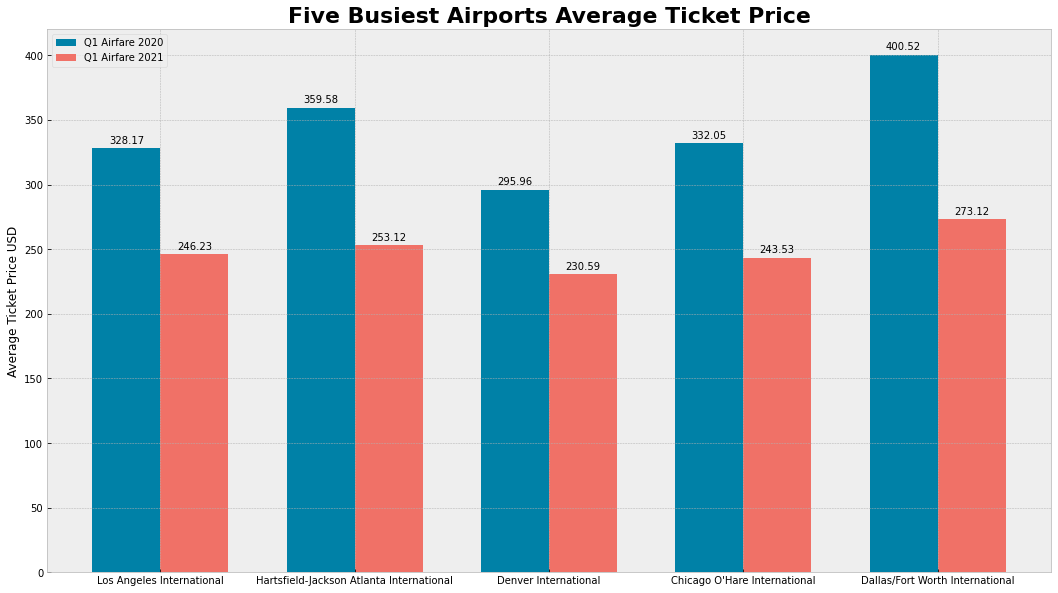

In [57]:
# BAR GRAPH FOR FIVE BUSIEST AIRPORTS


# Information to Graph
labels = airfare_2020['Airport_Name'][:5]
y = airfare_2020['Average_Fare'][:5]
y2 = airfare_2021['Average_Fare'][:5]


# Numpy for evenly spaced values
x = np.arange(len(labels))


# Bar width
width = 0.35


# Set figure and axes objects, increase graph size
fig, ax = plt.subplots(figsize=(18,10))


# Bars 
rects1 = ax.bar(x - width/2, y, width, color="#0081A7", label="Q1 Airfare 2020")
rects2 = ax.bar(x + width/2, y2, width, color="#F07167", label="Q1 Airfare 2021")


# Title
ax.set_title('Five Busiest Airports Average Ticket Price', fontdict={'fontweight': 'bold', 'fontsize': 22})


# X-Axis
plt.xticks(x, labels, horizontalalignment='center')


# Y-Axis
ax.set_ylabel('Average Ticket Price USD')


# Add labels and annotations to bar containers
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


# Add Legend
ax.legend()


plt.show()